In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

0     2.284856
1     1.541692
2     1.700683
3     1.708837
4     1.683773
5     1.741267
6     1.601102
7     1.616229
8     1.582712
9     1.435781
10    1.690109
11    1.484437
12    1.651490
13    1.781668
dtype: float64


/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


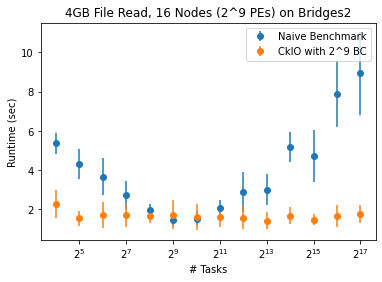

In [2]:

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#BC'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')
#plt.plot(summary_data['#BC'], 4/summary_data.iloc[:, 1:].mean(axis=1))


ckio_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
ckio_summary = pd.read_csv(ckio_file, sep=' ', header=None)
ckio_summary.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

print(ckio_summary.iloc[:, 2:].mean(axis=1))

# plt standard dev error bars
plt.errorbar(ckio_summary['#PEs'], ckio_summary.iloc[:, 2:].mean(axis=1), yerr=ckio_summary.iloc[:, 2:].std(axis=1), fmt='o')



# plot setup
plt.xscale('log', basex=2)
plt.xlabel('# Tasks')
plt.ylabel('Runtime (sec)')
plt.title('4GB File Read, 16 Nodes (2^9 PEs) on Bridges2')
plt.legend(['Naive Benchmark', 'CkIO with 2^9 BC'])




/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


Text(0.5, 1.0, '2^9MB, 64 nodes, 2^12 PEs ')

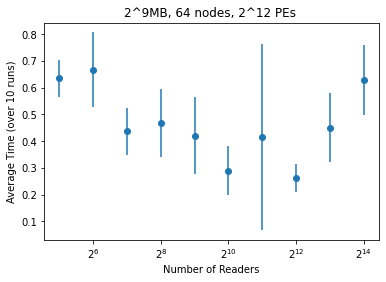

In [4]:

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = 'basic-chare-benchmarks/results/512MB_64nodes_64tasks/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#readers', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#readers'], summary_data.iloc[:, 1:].mean(axis=1), yerr=summary_data.iloc[:, 1:].std(axis=1), fmt='o')

# create new column that is the average of columns 1-10
# plot the same data but as inverse, 512 / value
#
# plt.plot(summary_data['#readers'], .5/summary_data.iloc[:, 1:].mean(axis=1))

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of Readers')
plt.ylabel('Average Time (over 10 runs)')
plt.title("2^9MB, 64 nodes, 2^12 PEs ")

/jet/home/mtaylor5/ckio-testsuite/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


Text(0, 0.5, 'Average Time (over 10 runs)')

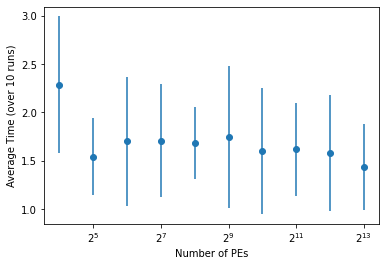

In [5]:
### plot basic summary data as PEs vs average time (with error bars) ###
summary_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#PEs', '#BC', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9', 'run10']

# plt standard dev error bars
plt.errorbar(summary_data['#PEs'], summary_data.iloc[:, 2:].mean(axis=1), yerr=summary_data.iloc[:, 2:].std(axis=1), fmt='o')

# plot setup
plt.xscale('log', basex=2)
plt.xlabel('Number of PEs')
plt.ylabel('Average Time (over 10 runs)')

In [11]:

### plot basic summary data as BC vs average time (with error bars) ###
summary_file = '/jet/home/mtaylor5/ckio-testsuite/ckio-benchmarks/results/16nodes_32tasks_4GB_BG/summary.out'

# read data in format (chares, 10 runs)
summary_data = pd.read_csv(summary_file, sep=' ', header=None)
summary_data.columns = ['#readers', "#BC", 'bg', 'total']

# group by number of readers and number of BC
summary_data = summary_data.groupby(['#readers', '#BC']).mean().reset_index()
print(summary_data)

# print to a text file
print(summary_data.to_string())


   #readers  #BC        bg     total
0        32  512  1.717357  1.769273
1        64  512  1.380348  1.425799
2       128  512  1.391785  1.438460
3       256  512  1.558141  1.603841
4       512  512  1.456631  1.501438
5      1024  512  1.456803  1.505231
6      2048  512  1.352156  1.396921
7      4096  512  1.407051  1.453916
8      8192  512  1.194008  1.238981
9     16384  512  1.099130  1.140232
   #readers  #BC        bg     total
0        32  512  1.717357  1.769273
1        64  512  1.380348  1.425799
2       128  512  1.391785  1.438460
3       256  512  1.558141  1.603841
4       512  512  1.456631  1.501438
5      1024  512  1.456803  1.505231
6      2048  512  1.352156  1.396921
7      4096  512  1.407051  1.453916
8      8192  512  1.194008  1.238981
9     16384  512  1.099130  1.140232
